<p style="text-align:center">
    <a href="https://www.ptit.edu.vn" target="_blank">
        <img src="https://i.imgur.com/XBSxCH1.png" width="400" alt="PTIT Logo">
    </a>
</p>


<center>

# **Practice lab: Cardiovascular Prediction**

</center>


### THƯ VIỆN 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import copy

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn import preprocessing
np.random.seed(2095)

### ĐỌC DỮ LIỆU TỪ DATASET

In [2]:
file_path = r'D:\PTIT-CNN-Prediction-Cardiovascular\CardiacPrediction.xlsx'
df = pd.read_excel(file_path, sheet_name='CoroHeartDis')
print(df.columns) 

Index(['SEQN', 'Gender', 'Age', 'Annual-Family-Income',
       'Ratio-Family-Income-Poverty', 'X60-sec-pulse', 'Systolic', 'Diastolic',
       'Weight', 'Height', 'Body-Mass-Index', 'White-Blood-Cells',
       'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells',
       'Hemoglobin', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Segmented-Neutrophils', 'Hematocrit', 'Red-Cell-Distribution-Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')


### KHAI PHÁ DỮ LIỆU

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37079 entries, 0 to 37078
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SEQN                         37079 non-null  int64  
 1   Gender                       37079 non-null  int64  
 2   Age                          37079 non-null  int64  
 3   Annual-Family-Income         37079 non-null  int64  
 4   Ratio-Family-Income-Poverty  37079 non-null  float64
 5   X60-sec-pulse                37079 non-null  int64  
 6   Systolic                     37079 non-null  int64  
 7   Diastolic                    37079 non-null  int64  
 8   Weight                       37079 non-null  float64
 9   Height                       37079 non-null  float64
 10  Body-Mass-Index              37079 non-null  float64
 11  White-Blood-Cells            37079 non-null  float64
 12  Lymphocyte                   37079 non-null  float64
 13  Monocyte        

In [4]:
df.describe()

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
count,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,...,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000
mean,48901.041236,1.513282,48.943661,7.358208,2.559026,72.579250,124.090078,69.919253,80.988276,167.389601,...,5.081713,1.370344,5.676496,1.783840,1.598856,1.218587,1.907333,1.549502,1.796165,0.040670
std,26753.636441,0.499830,18.010440,3.994083,1.624789,12.242108,19.254741,13.575804,20.678734,10.122908,...,1.072682,0.415985,1.050223,0.448324,0.511199,0.461102,0.349674,0.497550,0.402853,0.197527
min,2.000000,1.000000,20.000000,1.000000,0.000000,32.000000,0.000000,0.000000,32.300000,129.700000,...,1.530000,0.160000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,26120.500000,1.000000,33.000000,4.000000,1.140000,64.000000,111.000000,62.000000,66.500000,160.000000,...,4.320000,1.070000,5.200000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000
50%,50065.000000,2.000000,48.000000,7.000000,2.180000,72.000000,121.000000,70.000000,78.200000,167.100000,...,5.020000,1.290000,5.400000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000
75%,71173.500000,2.000000,63.000000,10.000000,4.130000,80.000000,134.000000,78.000000,92.100000,174.600000,...,5.740000,1.600000,5.800000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000
max,93702.000000,2.000000,85.000000,15.000000,5.000000,224.000000,270.000000,132.000000,371.000000,204.500000,...,14.090000,5.840000,18.800000,3.000000,3.000000,9.000000,3.000000,2.000000,2.000000,1.000000


### GIẢI THÍCH BỘ DỮ LIỆU LÂM SÀNG
- Chỉ số nhân khẩu học
    - Gender, Age: Giới tính và tuổi của bệnh nhân
    - SEQN: Mã định danh người tham gia
    - Annual-Family-Income: Thu nhập hàng năm của hộ gia đình
    - Ratio-Family-Income-Poverty: Tỷ lệ thu nhập hộ gia đình và ngưỡng nghèo liên bang
- Thông tin sinh lý cơ bản
    - X60-sec-pulse: Nhịp tim (số lần đập/phút)
    - Systolic: Huyết áp tâm thu
    - Diastolic: Huyết áp tâm trương
    - Weight: Trọng lượng
    - Height: Chiều cao
    - Body-Mass-Index: Chỉ số khối cơ thể (BMI)
- Chỉ số huyết học
    - White-Blood-Cells (WBC): Số lượng bạch cầu (10^3/μL), giúp đánh giá tình trạng nhiễm trùng hoặc các bệnh lý miễn dịch
    - Lymphocyte: Phần trăm lymphocyte, một loại bạch cầu liên quan đến miễn dịch
    - Monocyte: Phần trăm monocyte, tham gia vào việc chống lại nhiễm trùng
    - Eosinophils: Phần trăm bạch cầu ái toan, thường tăng trong các phản ứng dị ứng hoặc nhiễm ký sinh trùng
    - Basophils: Phần trăm bạch cầu ưa kiềm, liên quan đến các phản ứng dị ứng
    - Red-Blood-Cells (RBC): Số lượng hồng cầu (10^6/μL), đánh giá khả năng vận chuyển oxy
    - Hemoglobin (Hb): Nồng độ hemoglobin (g/dL), chỉ số quan trọng trong đánh giá thiếu máu
    - Mean-Cell-Vol (MCV): Thể tích trung bình của hồng cầu, giúp xác định loại thiếu máu
    - Mean-Cell-Hgb-Conc. (MCHC): Nồng độ hemoglobin trung bình trong một hồng cầu
    - Mean-cell-Hemoglobin (MCH): Lượng hemoglobin trung bình trong một hồng cầu
    - Platelet-count: Số lượng tiểu cầu (10^3/μL), liên quan đến khả năng đông máu
    - Mean-Platelet-Vol: Thể tích trung bình của tiểu cầu
    - Segmented-Neutrophils: Phần trăm bạch cầu trung tính, quan trọng trong đáp ứng miễn dịch
    - Hematocrit: Tỷ lệ phần trăm tế bào máu trong tổng thể tích máu
    - Red-Cell-Distribution-Width (RDW): Độ phân phối kích thước hồng cầu, thường tăng trong các dạng thiếu máu
- Chỉ số sinh hóa máu
    - Albumin: Protein trong huyết thanh, phản ánh tình trạng dinh dưỡng và chức năng gan
    - ALP (Alkaline Phosphatase): Enzym phosphatase kiềm, liên quan đến chức năng gan, mật và xương
    - AST (Aspartate Transaminase): Enzym liên quan đến tổn thương tế bào gan hoặc cơ tim
    - ALT (Alanine Transaminase): Enzym chỉ điểm tổn thương gan
    - Cholesterol: Cholesterol toàn phần (mmol/L), liên quan đến nguy cơ bệnh tim mạch
    - Creatinine: Sản phẩm thoái hóa của cơ, chỉ số chức năng thận
    - Glucose: Nồng độ đường trong máu, dùng để chẩn đoán bệnh tiểu đường
    - GGT (Gamma-Glutamyl Transferase): Enzym phản ánh tổn thương gan hoặc sử dụng rượu kéo dài
    - Iron: Hàm lượng sắt trong máu, liên quan đến bệnh thiếu máu hoặc quá tải sắt
    - LDH (Lactate Dehydrogenase): Enzym liên quan đến tổn thương tế bào
    - Phosphorus: Nồng độ photphat máu, quan trọng trong chức năng xương và thận
    - Bilirubin: Sản phẩm phân hủy của hemoglobin, chỉ điểm chức năng gan và mật
    - Protein: Tổng lượng protein trong huyết thanh
    - Uric.Acid: Nồng độ acid uric, liên quan đến bệnh gout
    - Triglycerides: Mỡ trung tính trong máu, liên quan đến bệnh lý tim mạch
    - Total-Cholesterol: Cholesterol toàn phần (mmol/L)
    - HDL: Cholesterol tốt (HDL), bảo vệ tim mạch
    - Glycohemoglobin (HbA1c): Chỉ số kiểm soát đường máu dài hạn, quan trọng trong bệnh tiểu đường
- Lối sống và yếu tố gia đình
    - Vigorous-work: Mức độ tham gia công việc nặng (mã hóa: 1 - Thấp, 3 - Cao)
    - Moderate-work: Mức độ tham gia công việc vừa (mã hóa tương tự)
    - Health-Insurance: Có bảo hiểm y tế hay không (1: Có, 2: Không)
    - Diabetes: Tiền sử bệnh tiểu đường (1: Có, 2: Không)
    - Blood-Rel-Diabetes: Có người thân bị tiểu đường (1: Có, 2: Không)
    - Blood-Rel-Stroke: Có người thân bị đột quỵ (1: Có, 2: Không)
- Biến mục tiêu
    - CoronaryHeartDisease: Biến mục tiêu, biểu thị bệnh tim mạch vành (0: Không mắc, 1: Mắc)

In [5]:
df['CoronaryHeartDisease'].value_counts()

CoronaryHeartDisease
0    35571
1     1508
Name: count, dtype: int64

📶  Có thể thấy sự mất cân bằng dữ liệu rất lớn trên tập dữ liệu này với tỉ lệ 1:35 (Người mắc bệnh : Người không mắc bệnh)

### TIỀN XỬ LÝ DỮ LIỆU

Kiểm tra các giá trị khuyết (Null, NaN)

In [6]:
null_counts = df.isnull().sum()
print(null_counts)

SEQN                           0
Gender                         0
Age                            0
Annual-Family-Income           0
Ratio-Family-Income-Poverty    0
X60-sec-pulse                  0
Systolic                       0
Diastolic                      0
Weight                         0
Height                         0
Body-Mass-Index                0
White-Blood-Cells              0
Lymphocyte                     0
Monocyte                       0
Eosinophils                    0
Basophils                      0
Red-Blood-Cells                0
Hemoglobin                     0
Mean-Cell-Vol                  0
Mean-Cell-Hgb-Conc.            0
Mean-cell-Hemoglobin           0
Platelet-count                 0
Mean-Platelet-Vol              0
Segmented-Neutrophils          0
Hematocrit                     0
Red-Cell-Distribution-Width    0
Albumin                        0
ALP                            0
AST                            0
ALT                            0
Cholestero

❌ Không có giá trị NULL trong bộ dữ liệu 

Kiểm tra trùng lặp

In [7]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


❌ Không có giá trị trùng lặp trong bộ dữ liệu 

### CHỌN LỌC BIẾN BẰNG HỒI QUY LASSO VÀ BỎ PHIẾU ĐA SỐ

### Hồi quy Lasso là gì?

**Hồi quy Lasso (Lasso Regression)** là một kỹ thuật trong phân tích dữ liệu và học máy, được sử dụng để thực hiện **hồi quy tuyến tính** trong đó có một bước điều chỉnh đặc biệt để giúp giảm thiểu mô hình quá phức tạp hoặc bị **overfitting**.

### Các Khái Niệm Cơ Bản:
- **Hồi quy tuyến tính (Linear Regression):** Là một mô hình thống kê dùng để dự đoán giá trị của biến phụ thuộc (y) từ các biến độc lập (x).
- **Overfitting:** Là hiện tượng khi mô hình học quá kỹ vào dữ liệu huấn luyện, dẫn đến việc không tổng quát được khi gặp dữ liệu mới.

### Lasso Regression:
- **Lasso** là viết tắt của **Least Absolute Shrinkage and Selection Operator**. Kỹ thuật này không chỉ thực hiện hồi quy tuyến tính mà còn có khả năng **chọn lọc đặc trưng** (feature selection).
- Lasso thêm vào một điều kiện ràng buộc (penalty term) vào trong hàm mất mát (loss function) của hồi quy tuyến tính.

$$
\text{Loss function} = \text{RSS} + \lambda \sum_{i=1}^{p} |\beta_i|
$$

Trong đó:
- **RSS (Residual Sum of Squares):** Tổng bình phương sai số dự đoán.
- **\(\beta_i\):** Các hệ số hồi quy của các biến độc lập.
- **\(\lambda\):** Hệ số điều chỉnh (regularization parameter), điều chỉnh mức độ ảnh hưởng của phần ràng buộc. Khi \(\lambda\) tăng, mức độ “co lại” của các hệ số hồi quy càng mạnh.

## Đặc Điểm Của Lasso:
1. **Feature Selection:** Lasso có thể đẩy một số hệ số hồi quy về 0, giúp loại bỏ các biến không có ảnh hưởng lớn. Điều này giúp chọn ra những đặc trưng quan trọng trong mô hình, giảm bớt độ phức tạp của mô hình.
2. **Điều chỉnh độ phức tạp:** Thông qua hệ số \(\lambda\), Lasso giúp điều chỉnh mô hình sao cho không bị overfitting, đồng thời vẫn duy trì khả năng dự đoán chính xác.
3. **Sử dụng trong dữ liệu có nhiều đặc trưng (features):** Lasso rất hữu ích khi bạn có một lượng lớn đặc trưng và muốn giảm số lượng đặc trưng đầu vào, đồng thời duy trì độ chính xác của mô hình.

### So Với Ridge Regression:
- Cả **Lasso** và **Ridge Regression** đều là các phương pháp hồi quy có điều chỉnh (regularized regression), nhưng khác biệt chính giữa chúng là:
  - **Lasso** sử dụng điều chỉnh L1 (làm giảm các hệ số về 0), trong khi **Ridge** sử dụng điều chỉnh L2 (làm giảm các hệ số về giá trị nhỏ, nhưng không phải bằng 0).
  - Lasso có khả năng loại bỏ các đặc trưng không quan trọng, trong khi Ridge thường chỉ làm giảm chúng mà không loại bỏ hoàn toàn.

### Ứng Dụng:
- Lasso regression thường được sử dụng khi bạn muốn:
  - Tìm ra các biến độc lập quan trọng nhất trong một mô hình.
  - Giảm thiểu overfitting trong các mô hình có nhiều biến.
  - Dự đoán trong các bài toán hồi quy với nhiều đặc trưng.

Nhờ vào khả năng chọn lọc đặc trưng và giảm độ phức tạp mô hình, Lasso là một công cụ mạnh mẽ trong phân tích và học máy.


### Tạo biến mục tiêu và loại bỏ các cột không cần thiết

In [3]:
opLabel = np.array(df['CoronaryHeartDisease'])

# Loại bỏ các cột không cần thiết
df.drop(
    ['SEQN', 'CoronaryHeartDisease', 'Annual-Family-Income', 'Height', 
     'Ratio-Family-Income-Poverty', 'X60-sec-pulse', 'Health-Insurance', 
     'Lymphocyte', 'Monocyte', 'Eosinophils', 'Total-Cholesterol', 
     'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.', 'Hematocrit', 'Segmented-Neutrophils'], 
    axis=1, 
    inplace=True
)

print(f"Số lượng biến trước khi tạo biến giả: {df.shape[1]}")

Số lượng biến trước khi tạo biến giả: 36


### Lý do xóa các cột được chỉ định trong Bộ dữ liệu


Trong danh sách này, có một số biến phụ thuộc tuyến tính về bản chất thu thập hoặc định 
lượng, cũng như một số biến không liên quan. Các biến này bao gồm: 
- Biến nhân khẩu học: Thu nhập hàng năm của gia đình, tỷ lệ thu nhập gia đình
nghèo. 
- Biến đo lường: Chiều cao, nhịp tim trong 60 giây. 
- Biến từ bảng câu hỏi: Bảo hiểm y tế. 
- Biến từ xét nghiệm máu: Lymphocyte, monocyte, eosinophil, cholesterol toàn 
phần, thể tích hồng cầu trung bình, nồng độ hemoglobin trung bình, hematocrit, 
neutrophil phân đoạn

Các biến này **không được xem xét** trong các bước xử lý và phân tích tiếp theo

In [4]:
# Chuyển đổi các biến phân loại thành biến giả
df = pd.get_dummies(df, columns=["Gender", "Diabetes", "Blood-Rel-Diabetes", 
                                 "Blood-Rel-Stroke", "Vigorous-work", "Moderate-work"])

# Kiểm tra số lượng biến sau chuyển đổi
print(f"Số lượng biến sau khi tạo biến giả: {df.shape[1]}")

# Lấy tên các cột biến đặc trưng và chuyển dataframe thành mảng numpy
varb = np.array(df.columns)
ipData = np.array(df)

# Khởi tạo mảng đếm tần suất (bỏ phiếu) cho các biến đặc trưng
featureVote = np.zeros(ipData.shape[1])

Số lượng biến sau khi tạo biến giả: 45


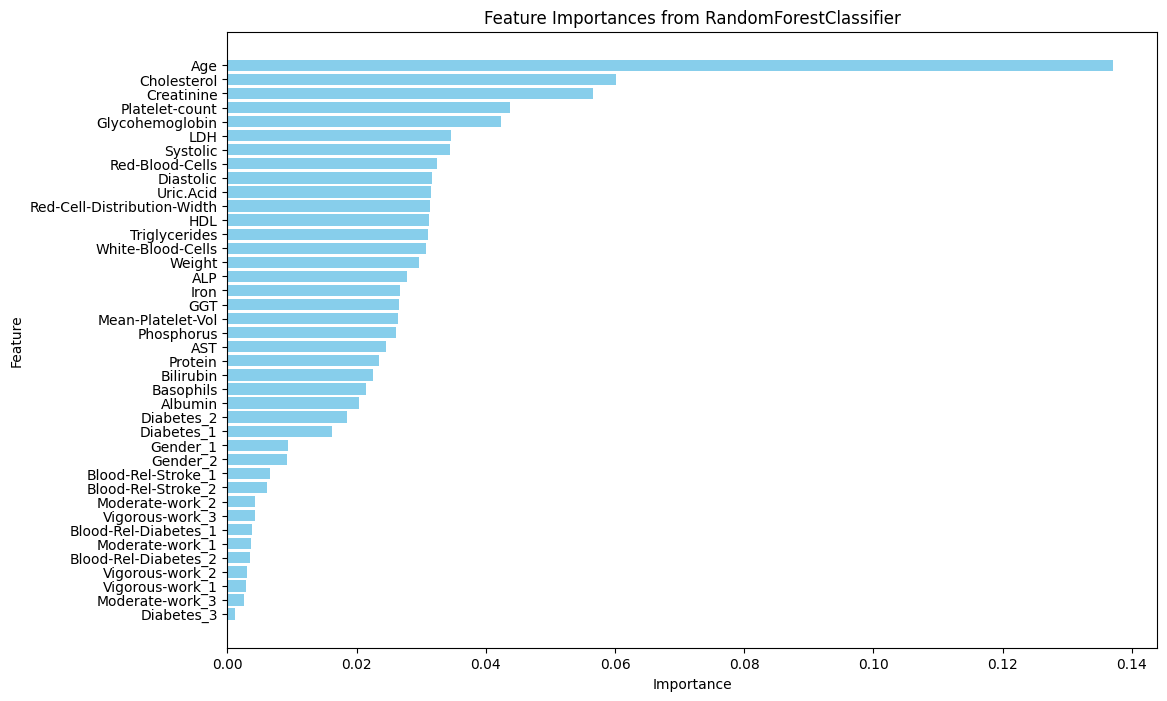

In [18]:
# Train a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train_org)

# Extract feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': selected_features_via_threshold,
    'Importance': importances
})

# Sort the DataFrame by importance
sorted_feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the sorted feature importances
plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_importances_df['Feature'], sorted_feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.gca().invert_yaxis()
plt.show()

### Tại Sao Số Lượng Biến Tăng Lên 45 Sau Khi One-Hot Encoding

Sau khi loại bỏ các cột, còn **36 biến**. Khi chuyển đổi các biến phân loại thành các biến giả (dummy variables) bằng lệnh `pd.get_dummies`, số lượng biến tăng lên thành **45**. Sự gia tăng này xảy ra vì mỗi biến phân loại được thay thế bằng nhiều cột nhị phân (0 hoặc 1), một cột cho mỗi hạng mục duy nhất trong các biến đó.

---

### Giải Thích Chi Tiết

Hãy phân tích các biến phân loại và số lượng biến giả có thể đã được tạo ra:

1. **`Gender`**:
   - Hạng mục có thể: **`1`, `2`**  
   - Tạo ra: **2 biến giả** – `Gender_1`, `Gender_2`

2. **`Diabetes`**:
   - Hạng mục có thể: **`1`, `2`, `3`**  
   - Tạo ra: **3 biến giả** – `Diabetes_1`, `Diabetes_2`, `Diabetes_3`

3. **`Blood-Rel-Diabetes`**:
   - Hạng mục có thể: **`1`, `2`**  
   - Tạo ra: **2 biến giả** – `Blood-Rel-Diabetes_1`, `Blood-Rel-Diabetes_2`

4. **`Blood-Rel-Stroke`**:
   - Hạng mục có thể: **`1`, `2`**  
   - Tạo ra: **2 biến giả** – `Blood-Rel-Stroke_1`, `Blood-Rel-Stroke_2`

5. **`Vigorous-work`**:
   - Hạng mục có thể: **`1`, `2`, `3`**  
   - Tạo ra: **3 biến giả** – `Vigorous-work_1`, `Vigorous-work_2`, `Vigorous-work_3`

6. **`Moderate-work`**:
   - Hạng mục có thể: **`1`, `2`, `3`**  
   - Tạo ra: **3 biến giả** – `Moderate-work_1`, `Moderate-work_2`, `Moderate-work_3`

---

### Tổng Số Biến Giả Được Tạo Ra

| Biến Phân Loại            | Số Biến Giả Được Tạo |
|----------------------------|----------------------|
| **Gender**                 | 2                    |
| **Diabetes**               | 3                    |
| **Blood-Rel-Diabetes**     | 2                    |
| **Blood-Rel-Stroke**       | 2                    |
| **Vigorous-work**          | 3                    |
| **Moderate-work**          | 3                    |
| **Tổng Cộng**              | **15**               |

---

### Tính Toán Số Biến Cuối Cùng

1. **Trước Khi One-Hot Encoding**: 36 biến  
2. **Sau Khi Thêm 15 Biến Giả**:  
   \[
   36 + 15 = 51
   \]

Tuy nhiên, vì `pd.get_dummies` thường **loại bỏ một biến giả cho mỗi biến phân loại** (để tránh bẫy biến giả hoặc hiện tượng đa cộng tuyến), nên sự gia tăng sẽ thấp hơn một chút:

- Số lượng tăng thêm thường là:  
  \[
  \text{Số lượng biến giả mới} = (\text{Tổng số hạng mục} - \text{Số lượng biến phân loại})
  \]

Trong trường hợp này, tổng số biến cuối cùng là **45** do sự điều chỉnh trên.

---



In [5]:
iteR = 100  # Số lần lặp lại

# Vòng lặp chọn lọc biến
for num in range(iteR):
    # Phân chia dữ liệu theo hai lớp
    label0_indx = np.where(opLabel == 0)[0]
    label1_indx = np.where(opLabel == 1)[0]
    numTrainData0 = 1300
    numTrainData1 = 1300

    # Xáo trộn chỉ số
    np.random.shuffle(label0_indx)
    np.random.shuffle(label1_indx)

    # Chia tập dữ liệu
    label0_indx_train = label0_indx[:numTrainData0-1]
    label1_indx_train = label1_indx[:numTrainData1-1]
    trainIndx = np.append(label0_indx_train, label1_indx_train)
    trainData = ipData[trainIndx]
    trainLabel = opLabel[trainIndx]

    # Chuẩn hóa dữ liệu
    scaler = preprocessing.StandardScaler().fit(trainData)
    trainData_scaled = scaler.transform(trainData)

    # Hồi quy Lasso
    regr = Lasso(random_state=0, alpha=0.006, tol=0.000001, max_iter=100000)
    regr.fit(trainData_scaled, trainLabel)

    # Ghi nhận các biến có trọng số khác 0
    cof = np.abs(regr.coef_)
    colIndx = np.where(cof != 0)[0]
    for col in colIndx:
        featureVote[col] += 1

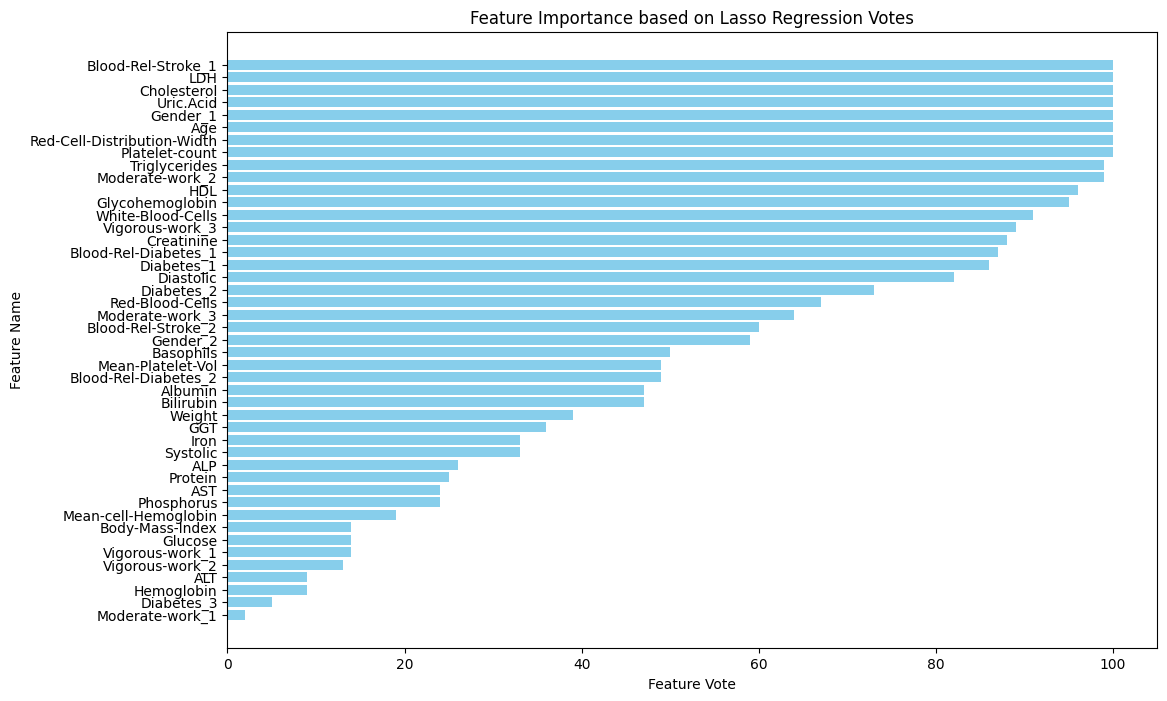

In [8]:
import matplotlib.pyplot as plt

# Sort the feature_table by 'Feature Vote' in ascending order
sorted_feature_table = feature_table.sort_values(by='Feature Vote')

# Create a bar plot for feature votes
plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_table['Feature Name'], sorted_feature_table['Feature Vote'], color='skyblue')
plt.xlabel('Feature Vote')
plt.ylabel('Feature Name')
plt.title('Feature Importance based on Lasso Regression Votes')
plt.show()

            Feature Name  Feature Vote
42       Moderate-work_1           2.0
34            Diabetes_3           5.0
16                   ALT           9.0
8             Hemoglobin           9.0
40       Vigorous-work_2          13.0
39       Vigorous-work_1          14.0
4        Body-Mass-Index          14.0
19               Glucose          14.0
9   Mean-cell-Hemoglobin          19.0
23            Phosphorus          24.0
15                   AST          24.0
25               Protein          25.0
14                   ALP          26.0
21                  Iron          33.0
1               Systolic          33.0
20                   GGT          36.0
3                 Weight          39.0


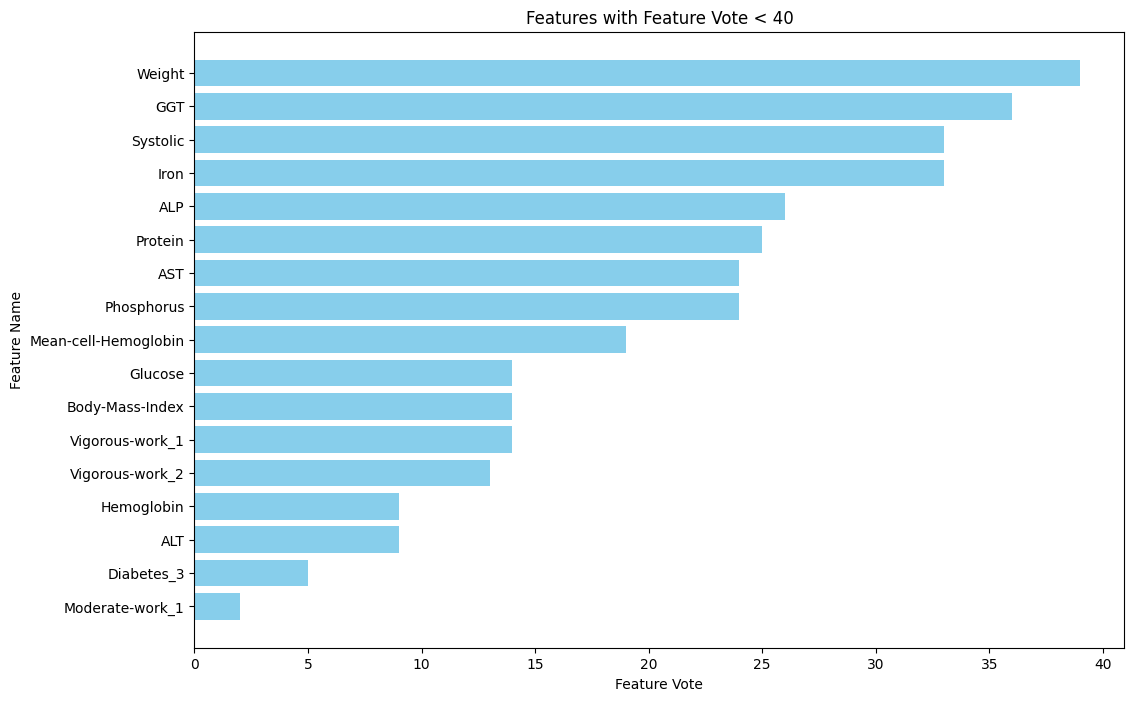

In [15]:
# Filter features with featureVote < 40
filtered_features = feature_table[feature_table['Feature Vote'] < 40]

# Sort the filtered features by 'Feature Vote' in ascending order
filtered_features = filtered_features.sort_values(by='Feature Vote')

# Print the filtered features
print(filtered_features)

# Plot the filtered features
plt.figure(figsize=(12, 8))
plt.barh(filtered_features['Feature Name'], filtered_features['Feature Vote'], color='skyblue')
plt.xlabel('Feature Vote')
plt.ylabel('Feature Name')
plt.title('Features with Feature Vote < 40')
plt.show()

In [8]:
print(varb[30:])


['Gender_1' 'Gender_2' 'Diabetes_1' 'Diabetes_2' 'Diabetes_3'
 'Blood-Rel-Diabetes_1' 'Blood-Rel-Diabetes_2' 'Blood-Rel-Stroke_1'
 'Blood-Rel-Stroke_2' 'Vigorous-work_1' 'Vigorous-work_2'
 'Vigorous-work_3' 'Moderate-work_1' 'Moderate-work_2' 'Moderate-work_3']


In [9]:
# Đặt ngưỡng tần suất
thresH = iteR // 5

# Chọn các biến có tần suất >= ngưỡng
featureIndx = np.where(featureVote[0:30] >= thresH)[0]

# Giữ lại các biến từ vị trí 30 trở đi
featureIndx = np.append(featureIndx, np.arange(30, ipData.shape[1]))

# Kiểm tra số lượng biến được chọn
print(f"Số lượng biến được chọn: {len(featureIndx)}")

# Lấy tên các biến được chọn
selected_features_via_threshold = varb[featureIndx]

# In các biến được chọn
print("Các biến đặc trưng được chọn:")
for feature in selected_features_via_threshold:
    print(feature)

Số lượng biến được chọn: 40
Các biến đặc trưng được chọn:
Age
Systolic
Diastolic
Weight
White-Blood-Cells
Basophils
Red-Blood-Cells
Platelet-count
Mean-Platelet-Vol
Red-Cell-Distribution-Width
Albumin
ALP
AST
Cholesterol
Creatinine
GGT
Iron
LDH
Phosphorus
Bilirubin
Protein
Uric.Acid
Triglycerides
HDL
Glycohemoglobin
Gender_1
Gender_2
Diabetes_1
Diabetes_2
Diabetes_3
Blood-Rel-Diabetes_1
Blood-Rel-Diabetes_2
Blood-Rel-Stroke_1
Blood-Rel-Stroke_2
Vigorous-work_1
Vigorous-work_2
Vigorous-work_3
Moderate-work_1
Moderate-work_2
Moderate-work_3


In [10]:
# Tìm các chỉ số của tất cả các biến trong tập dữ liệu gốc
tInx = np.arange(ipData.shape[1])

# Tìm các chỉ số của các biến không nằm trong danh sách được chọn
rrInx = tInx[~np.isin(tInx, featureIndx)]

# Lấy tên các biến bị loại bỏ
removed_features = varb[rrInx]
print(f"Số lượng biến bị loại bỏ: {len(removed_features)}")

# In danh sách các biến bị loại bỏ
print("Các biến đặc trưng bị loại bỏ sau chọn lọc:")
for feature in removed_features:
    print(feature)

Số lượng biến bị loại bỏ: 5
Các biến đặc trưng bị loại bỏ sau chọn lọc:
Body-Mass-Index
Hemoglobin
Mean-cell-Hemoglobin
ALT
Glucose


            Feature Name  Feature Vote
42       Moderate-work_1           2.0
34            Diabetes_3           5.0
16                   ALT           9.0
8             Hemoglobin           9.0
40       Vigorous-work_2          13.0
39       Vigorous-work_1          14.0
4        Body-Mass-Index          14.0
19               Glucose          14.0
9   Mean-cell-Hemoglobin          19.0
23            Phosphorus          24.0
15                   AST          24.0
25               Protein          25.0
14                   ALP          26.0
21                  Iron          33.0
1               Systolic          33.0
20                   GGT          36.0
3                 Weight          39.0


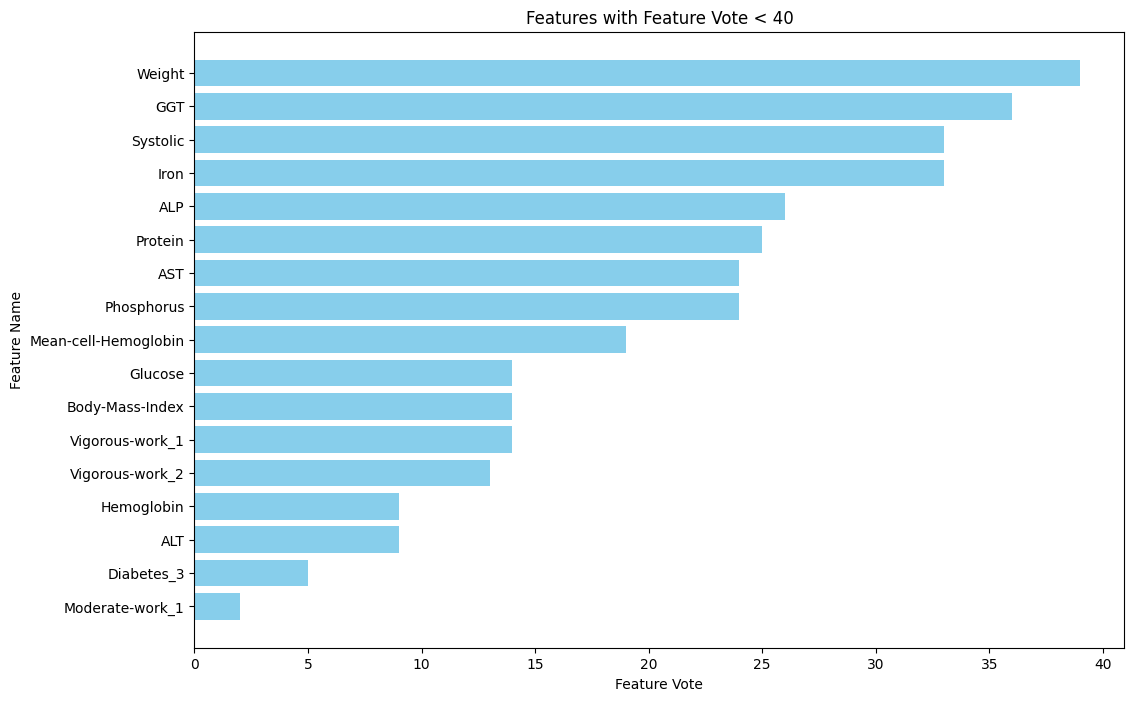

In [16]:
# Filter features with featureVote < 40
filtered_features = feature_table[feature_table['Feature Vote'] < 40]

# Sort the filtered features by 'Feature Vote' in ascending order
filtered_features = filtered_features.sort_values(by='Feature Vote')

# Print the filtered features
print(filtered_features)

# Plot the filtered features
plt.figure(figsize=(12, 8))
plt.barh(filtered_features['Feature Name'], filtered_features['Feature Vote'], color='skyblue')
plt.xlabel('Feature Vote')
plt.ylabel('Feature Name')
plt.title('Features with Feature Vote < 40')
plt.show()

### LÍ DO CHỌN NGƯỠNG = 20
- AUC ROC của ngưỡng từ 20 đến 40 đều xấp xỉ 0.864, sự khác biệt không nhiều
- Kết hợp biểu đồ của hồi quy Lasso, bỏ phiếu đa số và biểu đồ sử dụng hàm feature_importances_ của giải thuật rừng ngẫu nhiên
- Xét những đặc trưng có bỏ phiếu thấp hơn 40
    - GGC (Enzim phản ánh tổn thương gan do sử dụng rượu kéo dài): Sử dụng rượu kéo dài cũng gây nên các bệnh lý về tim mạch
    - Weight: Người béo dễ mắc bệnh tim mạch
    - Systolic (Huyết áp tâm thu): Chỉ số phản ảnh áp lực bên trong thành mạch khi tim co bóp, đẩy máu đi khắp cơ thể, người có Systolic cao thường là bị huyết áp cao, huyết áp cao tăng cho bệnh nhân thêm 30% khả năng bị bệnh tim
    - Phosphorus: Chỉ số phốt pho trong máu tăng cao dễ gây xơ vữa thành động mạch, là một yếu tố nhỏ để phát hiện bệnh tim mạch vành
    - AST là enzim sinh ra phản ánh tổn thương tế bào gan và cơ tim


### GIẢM TẬP DỮ LIỆU VÀ CHIA TẬP DỮ LIỆU HUẤN LUYỆN & KIỂM TRA

**MỤC ĐÍCH**
- Giảm kích thước dữ liệu bằng cách chỉ giữ lại các biến đặc trưng đã chọn thông qua hồi quy Lasso
- Chia dữ liệu thành tập huấn luyện (train) và kiểm tra (test) với số lượng mẫu được xác định riêng cho từng lớp (lớp 0 và lớp 1)
- Chuẩn hóa dữ liệu để sẵn sàng sử dụng trong các mô hình học máy
- Cho phép thay đổi kích thước tập huấn luyện bằng cách chỉnh sửa các biến numTrainData0 (số mẫu của lớp 0) và numTrainData1 (số mẫu của lớp 1)

In [12]:
# Giảm tập dữ liệu với các biến đặc trưng đã chọn từ dataframe df
reduced_data = df.iloc[:, featureIndx].values

# Tìm chỉ số của hai lớp (0 và 1)
label0_indx = np.where(opLabel == 0)[0]  # Lớp 0 (không bị bệnh)
label1_indx = np.where(opLabel == 1)[0]  # Lớp 1 (bị bệnh)

# Định nghĩa số lượng mẫu cho tập huấn luyện
numTrainData0 = 4300  # Số mẫu lớp 0 trong tập huấn luyện
numTrainData1 = 1169  # Số mẫu lớp 1 trong tập huấn luyện

# Xáo trộn chỉ số
np.random.shuffle(label0_indx)
np.random.shuffle(label1_indx)

# Chia tập huấn luyện và kiểm tra
label0_indx_train = label0_indx[:numTrainData0]
label1_indx_train = label1_indx[:numTrainData1]
label0_indx_test = label0_indx[numTrainData0:]
label1_indx_test = label1_indx[numTrainData1:]

# Gộp chỉ số của hai lớp
testIndx = np.append(label0_indx_test, label1_indx_test)
trainIndx = np.append(label0_indx_train, label1_indx_train)

# Tạo tập huấn luyện và kiểm tra
x_train = reduced_data[trainIndx]
y_train = opLabel[trainIndx]
x_test = reduced_data[testIndx]
y_test = opLabel[testIndx]

# Chuẩn hóa dữ liệu
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Sao lưu dữ liệu chuẩn hóa
x_train_org = copy.deepcopy(x_train)
x_test_org = copy.deepcopy(x_test)
y_train_org = copy.deepcopy(y_train)
y_test_org = copy.deepcopy(y_test)

# Kết quả tập dữ liệu huấn luyện và kiểm tra
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((5469, 40), (5469,), (31610, 40), (31610,))

- Tập huấn luyện (x_train) gồm 5469 mẫu và mỗi mẫu có 40 biến đặc trưng sau khi giảm dữ liệu
- Tập kiểm tra (x_test) gồm 31610 mẫu và mỗi mẫu cũng có 40 biến đặc trưng

### TRỰC QUAN HÓA DỮ LIỆU

### t-SNE Visualization

In [15]:
import imblearn
from collections import Counter
from sklearn.manifold import TSNE
import seaborn as sns

In [16]:
# Sử dụng t-SNE để giảm chiều dữ liệu xuống 3D
X_embedded = TSNE(n_components=3, n_iter=300, verbose=1).fit_transform(x_train)
# - `n_components=3`: Giảm chiều dữ liệu về 3 chiều để dễ trực quan hóa.
# - `n_iter=300`: Số lần lặp của thuật toán để hội tụ.
# - `verbose=1`: Hiển thị thông tin quá trình thực thi.
# - `fit_transform(x_train)`: Áp dụng t-SNE lên tập dữ liệu huấn luyện `x_train`.
# Kết quả: `X_embedded` là một mảng có kích thước (số mẫu, 3).

c:\Users\baoho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5469 samples in 0.000s...
[t-SNE] Computed neighbors for 5469 samples in 0.343s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5469
[t-SNE] Computed conditional probabilities for sample 2000 / 5469
[t-SNE] Computed conditional probabilities for sample 3000 / 5469
[t-SNE] Computed conditional probabilities for sample 4000 / 5469
[t-SNE] Computed conditional probabilities for sample 5000 / 5469
[t-SNE] Computed conditional probabilities for sample 5469 / 5469
[t-SNE] Mean sigma: 1.687809
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.251205
[t-SNE] KL divergence after 300 iterations: 2.295635


C:\Users\baoho\AppData\Local\Temp\ipykernel_1732\837101096.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(0, 0, 0, c=cin, edgecolors='k', label='CHD')


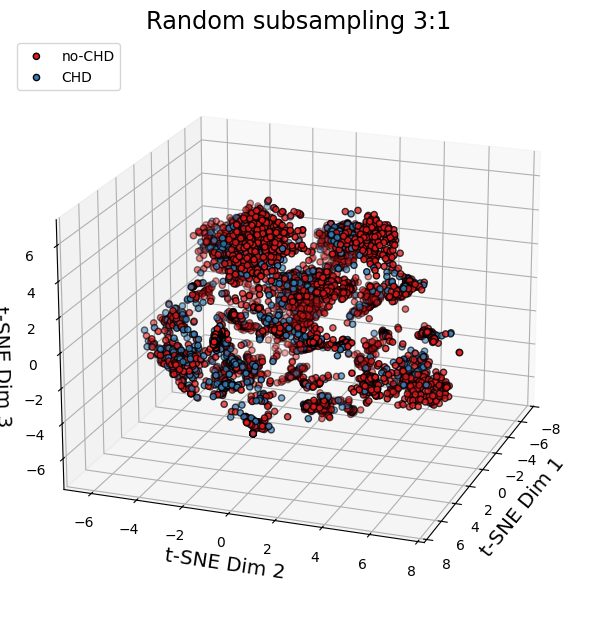

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Lấy màu sắc để vẽ các lớp
cin = sns.color_palette("Set1")[1]  # Màu sắc cho lớp "CHD"
edge_color = []  # Không sử dụng, nhưng khởi tạo danh sách trống.

# Tạo một biểu đồ 3D
fig = plt.figure()  # Tạo một hình (figure) mới.
ax = fig.add_subplot(111, projection='3d')  # Tạo biểu đồ 3D (projection='3d').

# Thiết lập nền của biểu đồ
ax.set_facecolor('w')  # Đặt màu nền biểu đồ thành trắng.

# Vẽ các điểm dữ liệu lên biểu đồ 3D
ax.scatter(
    X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], 
    c=[sns.color_palette("Set1")[x] for x in y_train],  # Màu sắc theo lớp trong `y_train`.
    edgecolors='k',  # Màu viền đen cho các điểm.
    label='no-CHD'   # Nhãn cho lớp không bị bệnh (no-CHD).
)

# Thêm một điểm tại (0, 0, 0) để đại diện cho lớp "CHD"
ax.scatter(0, 0, 0, c=cin, edgecolors='k', label='CHD')
# - Điểm (0, 0, 0) không thực sự nằm trong dữ liệu, chỉ dùng để hiển thị màu đại diện.

# Tùy chỉnh góc nhìn của biểu đồ
ax.azim = 20  # Góc xoay theo trục Z (azimuthal angle).
ax.elev = 20  # Góc nâng theo trục Y (elevation angle).

# Đặt nhãn cho các trục
ax.set_xlabel("t-SNE Dim 1", size="x-large")  # Nhãn trục X.
ax.set_ylabel("t-SNE Dim 2", size="x-large")  # Nhãn trục Y.
ax.set_zlabel("t-SNE Dim 3", size="x-large")  # Nhãn trục Z.

# Đặt tiêu đề cho biểu đồ
plt.title("Random subsampling 3:1", size="xx-large")
# Tiêu đề "Random subsampling 3:1" đề cập đến tỷ lệ lấy mẫu giữa các lớp.

# Hiển thị chú giải (legend) trên biểu đồ
ax.legend(loc='upper left')

# Đặt kích thước biểu đồ
fig.set_size_inches(7.5, 7.5)  # Kích thước (rộng x cao) của biểu đồ (tính bằng inches).

# Lưu biểu đồ dưới dạng file PNG
fig.savefig('tSNE_RUS.png', dpi=100)
# - File được lưu với tên 'tSNE_RUS.png'.
# - `dpi=100` quy định độ phân giải của hình ảnh (dots per inch).

| **Yếu tố**             | **Figure**          |
|-------------------------|---------------------------|
| **Phân bố dữ liệu**     | Có cụm rõ ràng         |
| **Sự chồng chéo lớp**   | Chồng chéo nhưng có cụm   |
| **Cụm nhỏ biệt lập**    | Xuất hiện ở rìa          |
| **Tập trung cụm**       | Tập trung ở trung tâm    |


**Phân bố dữ liệu**
- Có sự hình thành một số cụm (**clusters**) trong dữ liệu.
- **Cụm chính** tập trung ở trung tâm, với các điểm màu đỏ (**no-CHD**) chiếm ưu thế.
- Một số cụm nhỏ xuất hiện ở rìa, có thể đại diện cho các **mẫu dữ liệu ngoại lệ (outliers)** hoặc các nhóm dữ liệu có tính chất khác biệt.

**Sự chồng chéo giữa các lớp**
- Lớp **CHD** (xanh) và **no-CHD** (đỏ) không hoàn toàn phân tách, mà có sự **chồng chéo đáng kể**.
- Tuy nhiên, lớp **CHD** (xanh) dường như tập trung vào một số cụm nhỏ hơn, cho thấy khả năng tồn tại một số **thông tin có thể phân loại**.

**Cấu trúc cụm**
- Các **cụm lớn** ở trung tâm là nơi tập trung của cả hai lớp.
- Các cụm nhỏ ở rìa có vẻ chỉ thuộc về một lớp cụ thể (chủ yếu là **CHD**).
- Điều này có thể cho thấy rằng một số mẫu có **tính chất đặc thù**, dễ phân biệt hơn.

**Khả năng phân loại**
- **Sự chồng chéo** giữa các lớp trong các cụm lớn cho thấy việc phân loại giữa **CHD** và **no-CHD** có thể gặp thách thức với các thuật toán tuyến tính.
- Tuy nhiên, các cụm nhỏ và khu vực không chồng chéo gợi ý rằng vẫn có khả năng tách biệt dữ liệu với các **thuật toán phi tuyến tính** hoặc các **kỹ thuật trích xuất đặc trưng bổ sung**.

**Hiệu quả đặc trưng**
- Các đặc trưng được chọn thông qua **LASSO** đã giúp hình thành cấu trúc dữ liệu tương đối rõ ràng.
- Tuy nhiên, do sự chồng chéo giữa các lớp, các đặc trưng hiện tại chưa đủ mạnh để phân biệt hoàn toàn hai lớp.

**Dữ liệu ngoại lệ**
- Một số cụm nhỏ ở rìa có thể là **dữ liệu ngoại lệ** hoặc các nhóm dữ liệu có tính chất đặc biệt, cần được phân tích thêm để xem chúng có giá trị thông tin hay không.

### **Giải pháp**

**1. Cải thiện đặc trưng**
- Thử các phương pháp chọn lọc hoặc tạo thêm đặc trưng mới:
  - **Polynomial Features**: Tạo các đặc trưng bậc cao để nắm bắt mối quan hệ phi tuyến giữa các biến.
  - **Interaction Features**: Kết hợp các đặc trưng hiện tại để tạo các đặc trưng tương tác.
  - **Feature Engineering**: Tìm kiếm các đặc trưng bổ sung từ dữ liệu gốc hoặc nguồn dữ liệu khác.

**2. Xử lý mất cân bằng dữ liệu**
- Tỷ lệ giữa **CHD** và **no-CHD** (3:1) có thể dẫn đến việc lớp **CHD** bị đánh giá thấp.
- **Giải pháp**:
  - **Oversampling**: Sử dụng SMOTE để tăng số lượng mẫu của lớp **CHD**.
  - **Undersampling**: Giảm bớt số lượng mẫu của lớp **no-CHD** để cân bằng hơn.

**3. Thử nghiệm các thuật toán phi tuyến tính**
- **Random Forest**: Để nắm bắt mối quan hệ phi tuyến giữa các đặc trưng.
- **Gradient Boosting** (XGBoost, LightGBM): Phù hợp với các dữ liệu phức tạp và mất cân bằng.
- **Neural Networks**: Mạnh mẽ trong việc học các mối quan hệ phức tạp từ dữ liệu.

In [18]:
# Chuyển đổi dữ liệu `x_train` và `x_test` thành định dạng phù hợp cho mô hình (CNN)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [19]:
# One-hot encoding cho nhãn đầu ra
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)
# - Chuyển đổi nhãn (labels) thành dạng one-hot vector.
# - Ví dụ: nhãn `0` trở thành `[1, 0]`, nhãn `1` trở thành `[0, 1]`.
# - Tham số `2` là số lượng lớp (số nhãn khác nhau trong bài toán).

### MLP

### Đầu vào: Mô hình nhận dữ liệu đầu vào có kích thước (x_train.shape[1], 1), tương ứng với số đặc trưng và độ sâu (1 chiều).
### Các lớp ẩn:
- Gồm các tầng Dense (fully connected) với Batch Normalization, Activation ReLU, và Dropout để ngăn overfitting.
- Đầu ra: Sử dụng hàm kích hoạt softmax với 2 lớp để phân loại hai nhãn (nhị phân).
- Hàm mất mát: categorical_crossentropy dùng cho bài toán phân loại với nhãn one-hot encoded.
- Tối ưu hóa: Adam Optimizer với learning rate 0.01.

In [20]:
# Định nghĩa đầu vào với kích thước (x_train.shape[1], 1)
inputs = keras.layers.Input(shape=(x_train.shape[1], 1))

# Chuyển đổi kích thước từ (x_train.shape[1], 1) sang (x_train.shape[1], )
RS0 = keras.layers.Reshape((x_train.shape[1], ))(inputs)

# Lớp Fully Connected (Dense) đầu tiên với 512 neuron, khởi tạo trọng số bằng VarianceScaling
FC0 = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(RS0)

# Chuẩn hóa Batch Normalization để ổn định và tăng tốc độ huấn luyện
BN0 = keras.layers.BatchNormalization(axis=-1)(FC0)

# Hàm kích hoạt ReLU để học các đặc trưng phi tuyến tính
AC0 = keras.layers.Activation('relu')(BN0)

# Dropout 20% các neuron để giảm overfitting
DP0 = keras.layers.Dropout(0.2)(AC0)

# Lớp Fully Connected thứ hai với 128 neuron
FC1 = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(DP0)

# Chuẩn hóa Batch Normalization
BN1 = keras.layers.BatchNormalization(axis=-1)(FC1)

# Hàm kích hoạt ReLU
AC1 = keras.layers.Activation('relu')(BN1)

# Dropout 20% để giảm overfitting
DP1 = keras.layers.Dropout(0.2)(AC1)

# Lớp Fully Connected cuối cùng với 2 neuron, tương ứng với số lớp cần phân loại
FC2 = keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(DP1)

# Hàm kích hoạt Softmax để chuyển đầu ra thành xác suất của các lớp
outputs = keras.layers.Activation('softmax')(FC2)

# Định nghĩa mô hình từ đầu vào và đầu ra
myMLP = keras.Model(inputs=inputs, outputs=outputs)

# Biên dịch mô hình:
# - optimizer: Adam với learning rate 0.01
# - loss: categorical_crossentropy (dùng cho bài toán phân loại với nhãn one-hot encoded)
# - metrics: accuracy (độ chính xác)
myMLP.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Hiển thị tóm tắt mô hình, bao gồm số lượng lớp, số lượng tham số và kiến trúc chi tiết
myMLP.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 40, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        20,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,474 (349.51 KB)

 Trainable params: 88,194 (344.51 KB)

 Non-trainable params: 1,280 (5.00 KB)


#### **1. Thông tin chính**

| **Cột**                | **Ý nghĩa**                                                                                         |
|-------------------------|-----------------------------------------------------------------------------------------------------|
| **Layer (type)**        | Tên và loại lớp (Input, Reshape, Dense, BatchNormalization, Activation, Dropout, etc.).             |
| **Output Shape**        | Kích thước đầu ra của lớp (bao gồm số lượng mẫu `None` và số chiều của đầu ra).                     |
| **Param #**             | Số lượng tham số trong lớp.                                                                        |

---

#### **2. Chi tiết các lớp**

| **Layer**                | **Output Shape**   | **Param #**    | **Giải thích**                                                                                  |
|---------------------------|--------------------|-----------------|--------------------------------------------------------------------------------------------------|
| `InputLayer`             | `(None, 40, 1)`   | `0`             | Đầu vào có 40 đặc trưng, chiều sâu là 1.                                                        |
| `Reshape`                | `(None, 40)`      | `0`             | Chuyển kích thước từ `(40, 1)` sang `(40)`.                                                     |
| `Dense` (512 neurons)    | `(None, 512)`     | `20,992`        | `(40 đầu vào + 1 bias) * 512`.                                                                  |
| `BatchNormalization`     | `(None, 512)`     | `2,048`         | `2 * 512` tham số (gamma và beta).                                                              |
| `Activation (ReLU)`      | `(None, 512)`     | `0`             | Áp dụng hàm kích hoạt ReLU.                                                                     |
| `Dropout (20%)`          | `(None, 512)`     | `0`             | Tắt ngẫu nhiên 20% các neuron để giảm overfitting.                                              |
| `Dense` (128 neurons)    | `(None, 128)`     | `65,664`        | `(512 đầu vào + 1 bias) * 128`.                                                                 |
| `BatchNormalization`     | `(None, 128)`     | `512`           | `2 * 128` tham số (gamma và beta).                                                              |
| `Activation (ReLU)`      | `(None, 128)`     | `0`             | Áp dụng hàm kích hoạt ReLU.                                                                     |
| `Dropout (20%)`          | `(None, 128)`     | `0`             | Tắt ngẫu nhiên 20% các neuron.                                                                  |
| `Dense` (2 neurons)      | `(None, 2)`       | `258`           | `(128 đầu vào + 1 bias) * 2`.                                                                   |
| `Activation (Softmax)`   | `(None, 2)`       | `0`             | Tính xác suất cho 2 lớp đầu ra.                                                                 |

---

#### **3. Tổng số tham số**

- **Total params (Tổng tham số)**: `89,474`  
  Tổng số tham số trong tất cả các lớp.
  
- **Trainable params (Tham số có thể huấn luyện)**: `88,194`  
  Các tham số sẽ được tối ưu hóa trong quá trình huấn luyện.

- **Non-trainable params (Tham số không thể huấn luyện)**: `1,280`  
  Các tham số cố định, thường từ Batch Normalization (thống kê trung bình và phương sai).

---

#### **4. Kết luận**
- Mô hình bao gồm các lớp Dense lớn, tổng cộng `89,474` tham số, trong đó phần lớn có thể huấn luyện.
- Các lớp như `Dropout` và `Activation` không thêm tham số mà hỗ trợ cải thiện hiệu quả huấn luyện.
- Đây là một mạng MLP mạnh mẽ, được thiết kế để học phi tuyến từ dữ liệu với 40 đặc trưng.


In [21]:
class_weight = {0: 1, 1: 10}

myMLP.fit(x_train,y_train,epochs=50,batch_size=500,verbose=1, class_weight=class_weight)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5586 - loss: 2.0358 
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6788 - loss: 1.1665 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6757 - loss: 1.0749 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6913 - loss: 1.0456 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7144 - loss: 0.9454 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7036 - loss: 0.9521 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7140 - loss: 0.9179 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7369 - loss: 0.8812 
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7295 - loss: 0.8477 
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7357 - loss: 0.8749 
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7548 - loss: 0.8242 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

In [22]:
test_loss,test_acc = myMLP.evaluate(x_test,y_test)
print(test_acc)

988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.8392 - loss: 0.5149
0.8359696269035339


In [23]:
from sklearn import metrics
predlabel = myMLP.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step
[[26214  5057]
 [  128   211]]


### **MLP 3 HIDDEN LAYER** 


### Input → Dense(64) → Dense(128) → Dense(256) → Output (2 lớp)


In [24]:
# Định nghĩa lớp đầu vào với kích thước (số đặc trưng, 1)
inputs = keras.layers.Input(shape=(x_train.shape[1], 1))

# Chuyển đổi kích thước từ (số đặc trưng, 1) sang (số đặc trưng,)
RS0 = keras.layers.Reshape((x_train.shape[1], ))(inputs)

# Lớp Fully Connected đầu tiên với 64 neuron
FC0 = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)

# Batch Normalization để chuẩn hóa đầu ra của lớp Dense
BN0 = keras.layers.BatchNormalization(axis=-1)(FC0)

# Kích hoạt bằng hàm ReLU
AC0 = keras.layers.Activation('relu')(BN0)

# Dropout để tắt ngẫu nhiên 20% neuron, giảm overfitting
DP0 = keras.layers.Dropout(0.2)(AC0)

# Lớp Fully Connected thứ hai với 128 neuron
FC1 = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(DP0)

# Batch Normalization
BN1 = keras.layers.BatchNormalization(axis=-1)(FC1)

# Kích hoạt bằng ReLU
AC1 = keras.layers.Activation('relu')(BN1)

# Dropout để tắt ngẫu nhiên 20% neuron
DP1 = keras.layers.Dropout(0.2)(AC1)

# Lớp Fully Connected thứ ba với 256 neuron
FC2 = keras.layers.Dense(256, bias_initializer=keras.initializers.VarianceScaling())(DP1)

# Batch Normalization
BN2 = keras.layers.BatchNormalization(axis=-1)(FC2)

# Kích hoạt bằng ReLU
AC2 = keras.layers.Activation('relu')(BN2)

# Lớp Fully Connected cuối cùng với 2 neuron (tương ứng 2 lớp đầu ra)
FC3 = keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(AC2)

# Hàm kích hoạt Softmax để chuyển đổi đầu ra thành xác suất
outputs = keras.layers.Activation('softmax')(FC3)

# Định nghĩa mô hình với lớp đầu vào và đầu ra
myMLP3 = keras.Model(inputs=inputs, outputs=outputs)

# Biên dịch mô hình:
# - Optimizer: Adam với learning rate là 0.01
# - Loss: categorical_crossentropy, dùng cho bài toán phân loại với nhãn one-hot encoded
# - Metrics: Độ chính xác (accuracy)
myMLP3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Hiển thị kiến trúc mô hình, bao gồm các lớp, tham số và kích thước đầu ra
myMLP3.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 40, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,274 (180.76 KB)

 Trainable params: 45,378 (177.26 KB)

 Non-trainable params: 896 (3.50 KB)

### Kiến trúc:

- Mô hình có 3 lớp ẩn với số neuron lần lượt là 64 → 128 → 256.
- Mỗi lớp sử dụng Batch Normalization, ReLU activation, và Dropout (trừ lớp ẩn cuối cùng không sử dụng Dropout).
- Lớp đầu ra có 2 neuron và sử dụng Softmax để dự đoán xác suất của 2 lớp.
### Ưu điểm:

- Sử dụng Batch Normalization: Ổn định và tăng tốc độ hội tụ.
- Dropout: Giảm overfitting.
- Số lượng neuron tăng dần: Cho phép mô hình học các đặc trưng phức tạp hơn qua từng lớp.

### Nhược điểm tiềm năng:

- Learning rate 0.01 khá cao, có thể gây dao động trong quá trình hội tụ. ***có thể thử giá trị nhỏ hơn như 0.001***
- Việc không sử dụng Dropout ở lớp cuối cùng (256 neurons) có thể làm mô hình dễ overfit hơn.

In [25]:
class_weight = {0: 1, 1: 2.2}

myMLP3.fit(x_train,y_train,epochs=1,verbose=1, class_weight=class_weight)

171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7329 - loss: 0.8454


In [26]:
test_loss,test_acc = myMLP3.evaluate(x_test,y_test)
print(test_acc)

988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.8189 - loss: 0.3350
0.8183486461639404


In [27]:
from sklearn import metrics
predlabel = myMLP3.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step
[[25618  5653]
 [   89   250]]


### Input → Dense(128) → Reshape → Conv1D(4 filters) → MaxPooling → Flatten → Dense(2) → Output (Softmax)


In [28]:
# Định nghĩa lớp đầu vào với kích thước (số đặc trưng, 1)
inputs = keras.layers.Input(shape=(x_train.shape[1], 1))

# Chuyển đổi kích thước từ (số đặc trưng, 1) sang (số đặc trưng,)
RS0 = keras.layers.Reshape((x_train.shape[1], ))(inputs)

# Lớp Fully Connected đầu tiên với 128 neuron, khởi tạo trọng số bằng VarianceScaling
FC0 = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(RS0)

# Batch Normalization để chuẩn hóa đầu ra của lớp Dense, giúp ổn định quá trình huấn luyện
BN0 = keras.layers.BatchNormalization(axis=-1)(FC0)

# Hàm kích hoạt ReLU để thêm tính phi tuyến cho mô hình
AC0 = keras.layers.Activation('relu')(BN0)

# Dropout để tắt ngẫu nhiên 20% neuron, giúp giảm overfitting
DP0 = keras.layers.Dropout(0.2)(AC0)

# Chuyển đổi kích thước từ (128,) sang (128, 1) để phù hợp với lớp Conv1D
RS1 = keras.layers.Reshape((128, 1))(DP0)

# Lớp Convolutional 1D với 4 bộ lọc (filters), kernel size = 3 và strides = 1
FC1 = keras.layers.Conv1D(4, 3, strides=1)(RS1)

# Batch Normalization để chuẩn hóa đầu ra của lớp Conv1D
BN1 = keras.layers.BatchNormalization(axis=-1)(FC1)

# Hàm kích hoạt ReLU cho lớp Conv1D
AC1 = keras.layers.Activation('relu')(BN1)

# Lớp MaxPooling 1D với kích thước cửa sổ (pool_size) là 2, giảm kích thước đầu ra xuống một nửa
Pool1 = keras.layers.MaxPool1D(pool_size=2)(AC1)

# Làm phẳng đầu ra của lớp MaxPooling thành vector 1 chiều để đưa vào lớp Dense
FL1 = keras.layers.Flatten()(Pool1)

# Lớp Fully Connected cuối cùng với 2 neuron, tương ứng với 2 lớp đầu ra
FC3 = keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(FL1)

# Hàm kích hoạt Softmax để chuyển đổi đầu ra thành xác suất của 2 lớp
outputs = keras.layers.Activation('softmax')(FC3)

# Định nghĩa mô hình với đầu vào và đầu ra đã tạo
myCNN1D1 = keras.Model(inputs=inputs, outputs=outputs)

# Biên dịch mô hình với:
# - Optimizer: Adam (mặc định learning rate = 0.001)
# - Loss: categorical_crossentropy (dùng cho phân loại với nhãn one-hot encoded)
# - Metrics: accuracy (độ chính xác)
myCNN1D1.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Hiển thị tóm tắt kiến trúc mô hình, bao gồm kích thước đầu ra và số lượng tham số của từng lớp
myCNN1D1.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 40, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 128, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 126, 4)         │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 126, 4)         │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 126, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 63, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 252)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,298 (24.60 KB)

 Trainable params: 6,034 (23.57 KB)

 Non-trainable params: 264 (1.03 KB)

In [29]:
class_weight = {0: 1, 1: 4}

myCNN1D1.fit(x_train,y_train,epochs=1,verbose=1, class_weight=class_weight)

171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6469 - loss: 1.0902


In [30]:
test_loss,test_acc = myCNN1D1.evaluate(x_test,y_test)
print(test_acc)

988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - accuracy: 0.8714 - loss: 0.3451
0.8690288066864014


In [31]:
from sklearn import metrics
predlabel = myCNN1D1.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step
[[27264  4007]
 [  133   206]]


### Input → Dense(128) → Conv1D(4 filters) → Conv1D(8 filters) → Output (2 classes)


In [32]:
# Định nghĩa lớp đầu vào với kích thước (số đặc trưng, 1)
inputs = keras.layers.Input(shape=(x_train.shape[1], 1))

# Chuyển đổi kích thước từ (số đặc trưng, 1) sang (số đặc trưng,)
RS0 = keras.layers.Reshape((x_train.shape[1], ))(inputs)

# Lớp Fully Connected (Dense) đầu tiên với 128 neuron, khởi tạo trọng số bằng VarianceScaling
FC0 = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(RS0)

# Batch Normalization để chuẩn hóa đầu ra của lớp Dense, giúp ổn định quá trình huấn luyện
BN0 = keras.layers.BatchNormalization(axis=-1)(FC0)

# Hàm kích hoạt ReLU để thêm tính phi tuyến cho mô hình
AC0 = keras.layers.Activation('relu')(BN0)

# Dropout để tắt ngẫu nhiên 20% neuron, giúp giảm overfitting
DP0 = keras.layers.Dropout(0.2)(AC0)

# Chuyển đổi kích thước từ (128,) sang (128, 1) để phù hợp với lớp Conv1D
RS1 = keras.layers.Reshape((128, 1))(DP0)

# Lớp Convolutional 1D với 4 bộ lọc (filters), kernel size = 3 và strides = 1
FC1 = keras.layers.Conv1D(4, 3, strides=1)(RS1)

# Batch Normalization để chuẩn hóa đầu ra của lớp Conv1D
BN1 = keras.layers.BatchNormalization(axis=-1)(FC1)

# Hàm kích hoạt ReLU cho lớp Conv1D
AC1 = keras.layers.Activation('relu')(BN1)

# Lớp Average Pooling 1D với kích thước cửa sổ (pool_size) là 2, giảm kích thước đầu ra một nửa
Pool1 = keras.layers.AveragePooling1D(pool_size=2)(AC1)

# Lớp Convolutional 1D thứ hai với 8 bộ lọc (filters), kernel size = 5 và strides = 1
FC2 = keras.layers.Conv1D(8, 5, strides=1)(Pool1)

# Batch Normalization để chuẩn hóa đầu ra của lớp Conv1D thứ hai
BN2 = keras.layers.BatchNormalization(axis=-1)(FC2)

# Hàm kích hoạt ReLU cho lớp Conv1D thứ hai
AC2 = keras.layers.Activation('relu')(BN2)

# Lớp Average Pooling 1D với kích thước cửa sổ (pool_size) là 2, giảm kích thước đầu ra một nửa
Pool2 = keras.layers.AveragePooling1D(pool_size=2)(AC2)

# Làm phẳng đầu ra từ lớp Pooling để chuyển thành vector 1 chiều cho lớp Dense
FL1 = keras.layers.Flatten()(Pool2)

# Lớp Fully Connected (Dense) cuối cùng với 2 neuron, tương ứng với 2 lớp đầu ra
FC3 = keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(FL1)

# Hàm kích hoạt Softmax để chuyển đổi đầu ra thành xác suất của 2 lớp
outputs = keras.layers.Activation('softmax')(FC3)

# Định nghĩa mô hình với đầu vào và đầu ra đã tạo
myCNN1D2 = keras.Model(inputs=inputs, outputs=outputs)

# Biên dịch mô hình với:
# - Optimizer: Adam (mặc định learning rate = 0.001)
# - Loss: categorical_crossentropy (dùng cho phân loại với nhãn one-hot encoded)
# - Metrics: accuracy (độ chính xác)
myCNN1D2.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Hiển thị tóm tắt kiến trúc mô hình, bao gồm kích thước đầu ra và số lượng tham số của từng lớp
myCNN1D2.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 40, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 128, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 126, 4)         │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 126, 4)         │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 126, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d               │ (None, 63, 4)          │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 59, 8)          │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 59, 8)          │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 59, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_1             │ (None, 29, 8)          │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 232)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │           466 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,458 (25.23 KB)

 Trainable params: 6,178 (24.13 KB)

 Non-trainable params: 280 (1.09 KB)